In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


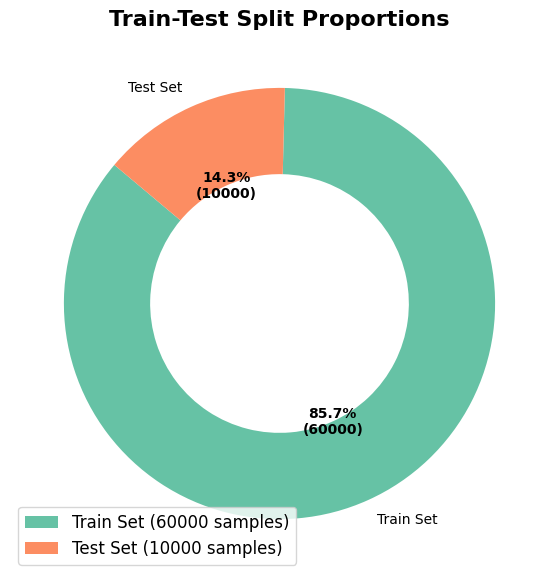

In [ ]:
from matplotlib.patches import Patch
# Train-test split visualization
def plot_train_test_split_pie(x_train, x_test):
    train_size = len(x_train)
    test_size = len(x_test)

    # Define the labels and sizes
    labels = ['Train Set', 'Test Set']
    sizes = [train_size, test_size]
    colors = ['#66c2a5', '#fc8d62']

    # Create the pie chart
    fig, ax = plt.subplots(figsize=(7, 7))
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct=lambda p: f'{p:.1f}%\n({int(p / 100 * sum(sizes))})',
        startangle=140,
        colors=colors,
        wedgeprops=dict(width=0.4)
    )

    # Customize text appearance
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)

    # Add a title
    plt.title('Train-Test Split Proportions', fontsize=16, fontweight='bold')
    plt.setp(autotexts, size=10, weight="bold")

    # Create a legend
    legend_elements = [Patch(facecolor=colors[0], label=f'Train Set ({train_size} samples)'),
                       Patch(facecolor=colors[1], label=f'Test Set ({test_size} samples)')]
    ax.legend(handles=legend_elements, loc='best', fontsize=12)

    # Display the plot
    plt.show()

# Call the function to visualize the train-test split
plot_train_test_split_pie(x_train, x_test)

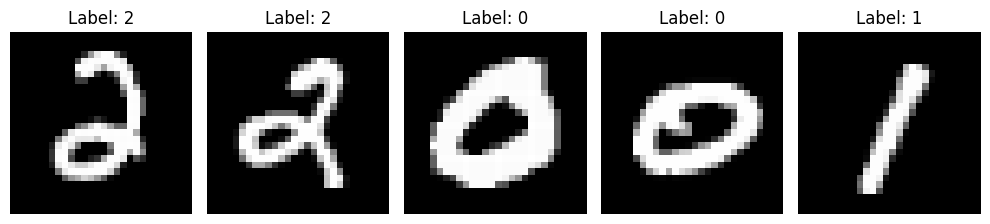

In [ ]:
def plot_sample_images(X, y, num_samples=5):
    plt.figure(figsize=(10, 5))

    for i in range(num_samples):
        # Select a random index
        index = np.random.randint(0, len(X))

        # Plot image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[index].reshape(28, 28), cmap='gray')
        plt.axis('off')

        # Show the label
        label = np.argmax(y[index])  # Get the original label from one-hot encoded
        plt.title(f'Label: {label}')

    plt.tight_layout()
    plt.show()

# Visualize 5 random sample images
plot_sample_images(x_train, y_train, num_samples=5)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the improved CNN model
def create_improved_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # First convolutional layer with Batch Normalization
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer with Batch Normalization
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional layer with Batch Normalization
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output and add Dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))  # Increased the Dense layer size
    model.add(layers.Dropout(0.5))  # Added Dropout for regularization
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create and summarize the improved model
model = create_improved_cnn_model(input_shape=(28, 28, 1), num_classes=10)
print(model.summary())

# Compile model
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 391,306 (1.49 MB)

 Trainable params: 390,858 (1.49 MB)

 Non-trainable params: 448 (1.75 KB)

None


In [ ]:
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.2,
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/10
1500/1500 - 109s - 72ms/step - accuracy: 0.9469 - loss: 0.1822 - val_accuracy: 0.9657 - val_loss: 0.1122
Epoch 2/10
1500/1500 - 141s - 94ms/step - accuracy: 0.9775 - loss: 0.0803 - val_accuracy: 0.9888 - val_loss: 0.0404
Epoch 3/10
1500/1500 - 143s - 95ms/step - accuracy: 0.9829 - loss: 0.0615 - val_accuracy: 0.9862 - val_loss: 0.0482
Epoch 4/10
1500/1500 - 142s - 95ms/step - accuracy: 0.9844 - loss: 0.0542 - val_accuracy: 0.9820 - val_loss: 0.0680
Epoch 5/10
1500/1500 - 141s - 94ms/step - accuracy: 0.9874 - loss: 0.0468 - val_accuracy: 0.9893 - val_loss: 0.0491
Epoch 6/10
1500/1500 - 103s - 68ms/step - accuracy: 0.9888 - loss: 0.0402 - val_accuracy: 0.9899 - val_loss: 0.0436
Epoch 7/10
1500/1500 - 142s - 95ms/step - accuracy: 0.9909 - loss: 0.0318 - val_accuracy: 0.9918 - val_loss: 0.0429


In [ ]:
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

313/313 - 5s - 16ms/step - accuracy: 0.9893 - loss: 0.0360


[0.035988692194223404, 0.989300012588501]

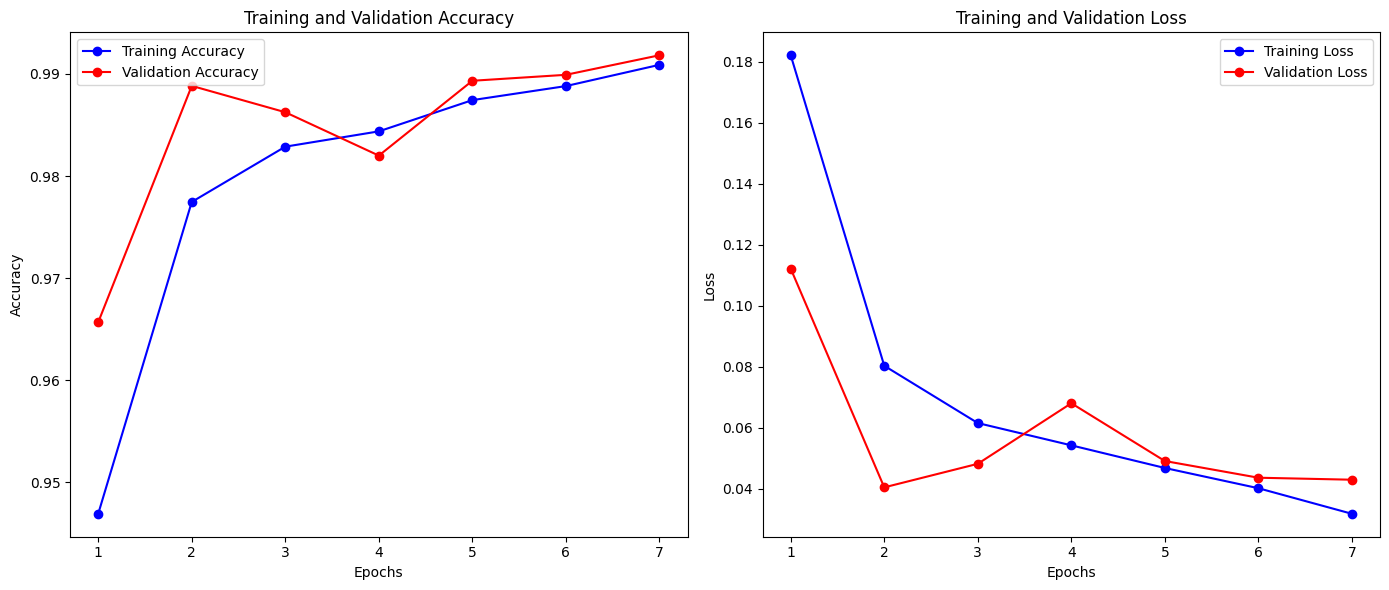

In [ ]:
def plot_training_history(history):
    # Get the values from the training history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot training & validation accuracy
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy and loss graphs
plot_training_history(history)